In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/moiznoorali/Desktop/Data Science Business Complete Analysis/Walmart Complete Analysis/Walmart Data Analysis and Forcasting.csv')

#### Finding the heads and columns of the dataset

In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
df.shape

(6435, 8)

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### Getting Rid of the null 'NaN' values if any in this dataset

No need to worry since there are no null values in this dataset

In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Want to see how many Holiday Flags there are in this dataset

In [14]:
holiday_flag = df['Holiday_Flag'].value_counts()
holiday_flag

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

I want to plot all the ones which have a holiday flag vs no holiday flags

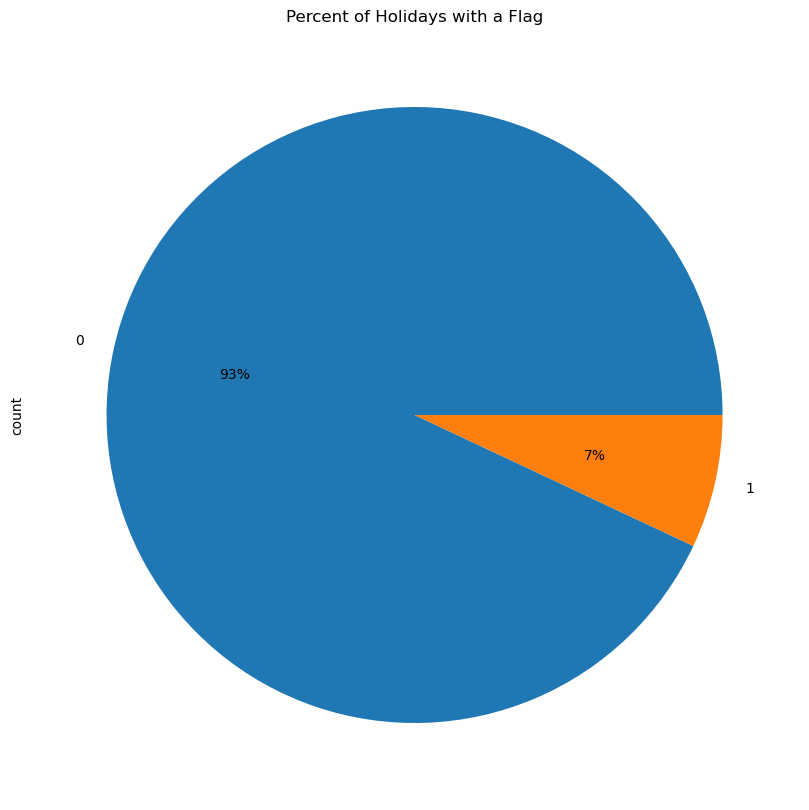

In [22]:
df['Holiday_Flag'].value_counts().plot.pie(figsize = (10, 10), autopct = '%1.0f%%') 
plt.title("Percent of Holidays with a Flag")
plt.xticks(rotation = 90)
plt.show()

#### Analyzing the weekly sales based on the number of stores

In [53]:
df['Store'].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

In [41]:
df['Store'].head

<bound method NDFrame.head of 0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64>

In [36]:
store_df = df[['Store', 'Weekly_Sales', 'Unemployment']].groupby(by = 'Store').head(20).reset_index(drop = True) 
store_df

,Store,Weekly_Sales,Unemployment
0,1,1643690.90,8.106
1,1,1641957.44,8.106
2,1,1611968.17,8.106
3,1,1409727.59,8.106
4,1,1554806.68,8.106
...,...,...,...
895,45,747888.25,8.899
896,45,801098.43,8.899
897,45,837548.62,8.899
898,45,794698.77,8.899


#### Finding which stores have the lowest weekly sales and which stores have the highest weekly sales

In [64]:
lowest_weekly_sales = df['Weekly_Sales'].min()
lowest_weekly_sales

209986.25

In [47]:
highest_weekly_sales = df['Weekly_Sales'].max()
highest_weekly_sales

3818686.45

#### Finding the Average Weekly Sales of All the 45 Stores

In [48]:
avg_weekly_sales = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].mean())
avg_weekly_sales

,Weekly_Sales
Store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05
6,1.564728e+06
7,5.706173e+05
8,9.087495e+05
9,5.439806e+05


Text(0.5, 1.0, 'Average Weekly Sales Corresponding to Each Store')

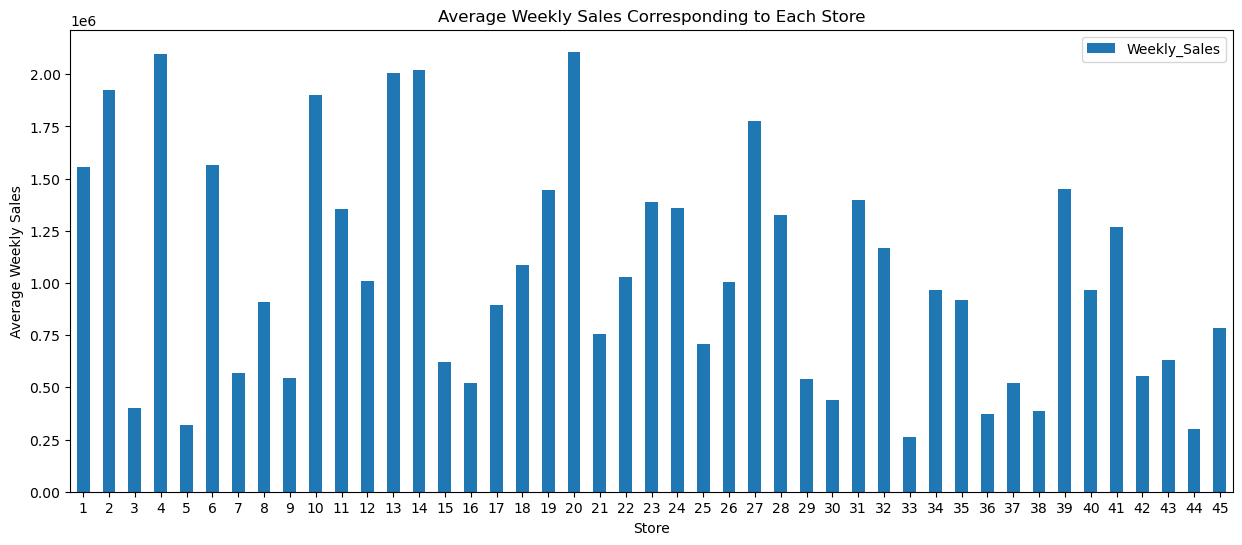

In [66]:
avg_weekly_sales.plot(kind="bar", rot = 0, figsize = (15, 6))
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales Corresponding to Each Store')

#### Which stores have the Lowest Unemployment

In [68]:
store_unemp_df = df[['Store', 'Unemployment']].groupby(by = 'Store').head(20).reset_index(drop = True)
store_unemp_df

,Store,Unemployment
0,1,8.106
1,1,8.106
2,1,8.106
3,1,8.106
4,1,8.106
...,...,...
895,45,8.899
896,45,8.899
897,45,8.899
898,45,8.899


#### Repeating the same logic as done previously to find the averages unemployments of all the 45 stores

1) Finding the lowest and highest unemployment of all the stores 
2) Finding the average unemployment levels of all the 45 stores
3) Finally, graphing the visualization of all the stores for a better birds eye view of the data

In [70]:
lowest_store_unemp = df['Unemployment'].min()
lowest_store_unemp

3.879

In [71]:
highest_store_unemp = df['Unemployment'].max()
highest_store_unemp

14.313

In [72]:
avg_store_unemp = pd.DataFrame(df.groupby('Store')['Unemployment'].mean())
avg_store_unemp

,Unemployment
Store,
1,7.610420
2,7.623846
3,7.176986
4,5.964692
5,6.295406
6,6.606902
7,8.585734
8,6.091846
9,6.099881


Text(0.5, 1.0, 'Average Unemployment Corresponding to Each Store')

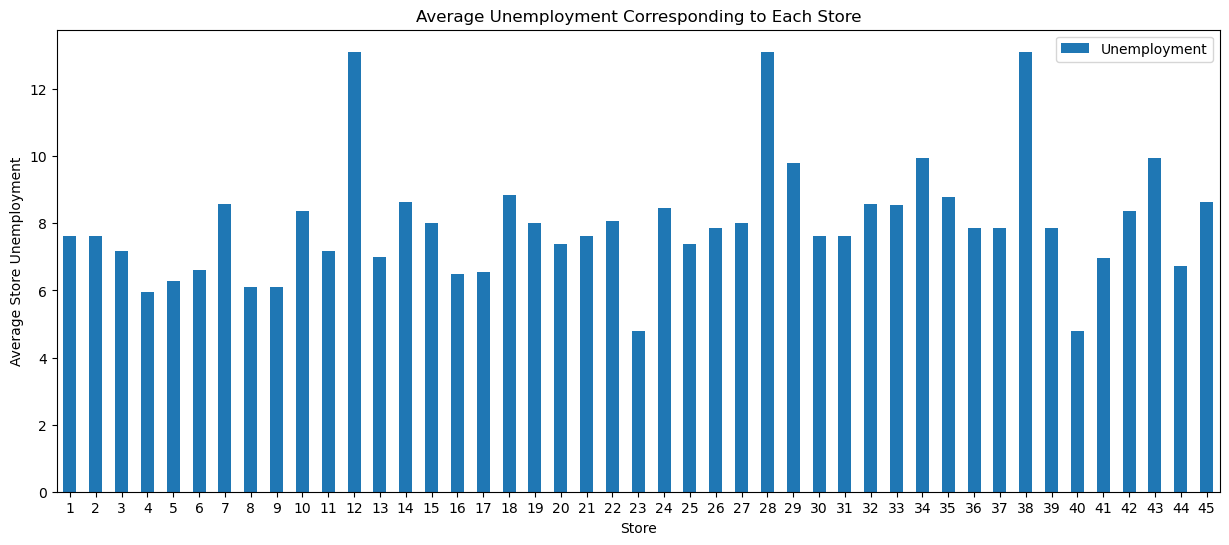

In [73]:
avg_store_unemp.plot(kind="bar", rot = 0, figsize = (15, 6))
plt.xlabel('Store')
plt.ylabel('Average Store Unemployment')
plt.title('Average Unemployment Corresponding to Each Store')

#### Working with CPIs

We will start by grouping the CPI by year. Then we will plot the values in the form of a pie chart

In [75]:
df['Year'] = pd.DatetimeIndex(df.Date).year

As you can tell, there are three years that were extracted from this dataset

In [76]:
df['Year'].value_counts()

Year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

In [77]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010


In [88]:
cpi_year = pd.DataFrame(df.groupby('Year')['CPI'].mean().sort_values(ascending = False).reset_index()).head()
cpi_year

,Year,CPI
0,2012,175.498781
1,2011,171.545716
2,2010,168.101782


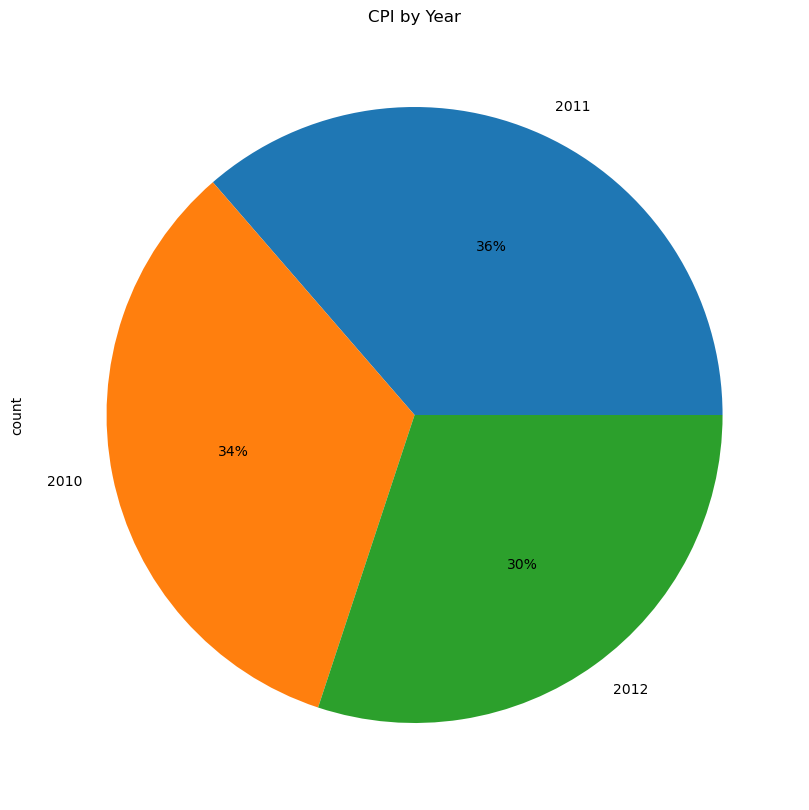

In [93]:
df['Year'].value_counts().plot.pie(figsize = (10, 10), autopct = '%1.0f%%') 
plt.title("CPI by Year")
plt.xticks(rotation = 180)
plt.show()